In [53]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers


En este ejercicio utilizaremos un dataset de imdb que contiene una lista de valoraciones de peliculas, que incluye el comentarios respecto a la pelicula y una clasificacion de 1 para criticas positivas y 0 para las negativas.

In [31]:
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [33]:
train_labels[0]

1

In [22]:
word_index=imdb.get_word_index() 

<H1> PREPARACION DEL DATASET </H1>

<p>Como podemos observar el dataset de imdb que estamos utilizando retorna una lista que no tiene dimension alguna, es decir, no es un tensor, por lo que la red neuronal que construyamos no podrá procesarlo. En las siguientes lineas transformamos esta lista en un formato float32 que keras entienda.</p>

In [34]:
word_index=dict([(value,key) for (key,value) in word_index.items()]) #esto es para que los indices y las palabras queden en la posicion correcta

In [ ]:
word_index

In [ ]:
for _ in train_data[0]:
  print(word_index.get(_ -3)) #lo del -3 se encuentra en la documentacion y es porque los primeros 3 indices son reservadas, 
                              #al final tendremos una descripcion con sentido.

In [37]:
#VECTORIZAR: como keras solo recibe tensores (numeros de coma flotante) para ello es necesario vectorizar

def vectorizar(sequences, dim=10000):
  results=np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results



In [38]:
x_train=vectorizar(train_data) #ahora podemos pasar nuetra data de la forma que admite keras
x_test=vectorizar(test_data)

In [39]:
y_train=np.asarray(train_labels).astype('float32') # de igual forma con los labels
y_test=np.asarray(test_labels).astype('float32')

<h1>ENTRANAMIENTO</h1>

Utilizaremos la funcion de perdida binary cross entropy que es la recomendada en la clasificacion binaria.

In [57]:
#construcción del modelo

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #Esta es la unica capa que necesita el input
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #la ultima capa debe ser una que me clasifique en positivo o negativo,
                                                #ademas utilizamos la funcion sigmoid que me da la probabilidad

In [58]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy') 
 #este optimizador actua de mejor forma que el descenso del gradiente utilizado en el ejercicio anterior y es el que viene por defecto
 #la funcion de perdida que recomiendan
 #la metrica de exito que utilizamos es el accuracy

A continuación, creamos la data de validacion

In [59]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Ahora lo interesante, entrenamos el modelo guardando los resultados en una variable llamada history.

In [60]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val)) #aqui vemos como desde el entranamiento se empieza a hacer validaciones

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5306 - accuracy: 0.7758 - val_loss: 0.4205 - val_accuracy: 0.8454
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3367 - accuracy: 0.8901 - val_loss: 0.3304 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2546 - accuracy: 0.9161 - val_loss: 0.2868 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2049 - accuracy: 0.9330 - val_loss: 0.2761 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1709 - accuracy: 0.9440 - val_loss: 0.2801 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1474 - accuracy: 0.9528 - val_loss: 0.2796 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1253 - accuracy: 0.9606 - val_loss: 0.3254 - val_accuracy: 0.8774
Epoch 8/20
30

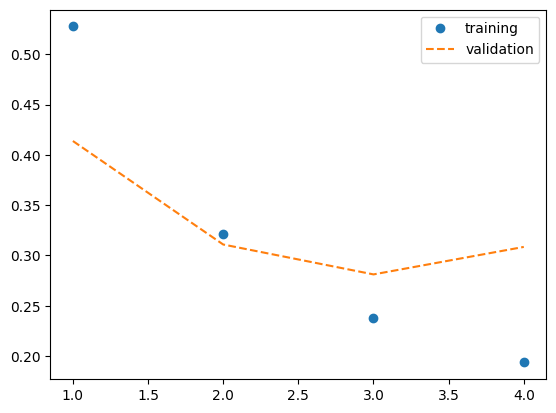

In [56]:
#Grafiquemos
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epoch=range(1,len(loss_values)+1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

De momento, el entrenamiento en el set de datos de training converge rapidamente, pero en el set de datos de validacion llega a un punto donde hay overfitting, vamos a corregir esto.

Existen ciertas tecnicas que nos ayudan a corregir el overfitting por ejemplo:

<li>Utilizar un modelo mas pequeño</li>
<li>Regularizacion: reducir los pesos</li>
<li>Dropout: apagar aleatoriamente neuronas de cada capa en cada iteracion</li>


In [64]:
#MODELO MENOS COMPLEJO

model2=models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid')) 
                                           
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy') 

history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 54ms/step - loss: 0.6098 - accuracy: 0.7468 - val_loss: 0.5331 - val_accuracy: 0.8450
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4691 - accuracy: 0.8707 - val_loss: 0.4357 - val_accuracy: 0.8655
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3756 - accuracy: 0.8965 - val_loss: 0.3846 - val_accuracy: 0.8690
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3115 - accuracy: 0.9115 - val_loss: 0.3331 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2656 - accuracy: 0.9197 - val_loss: 0.3077 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2323 - accuracy: 0.9289 - val_loss: 0.2907 - val_accuracy: 0.8906
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2060 - accuracy: 0.9384 - val_loss: 0.2823 - val_accuracy: 0.8901
Epoch 8/20
30

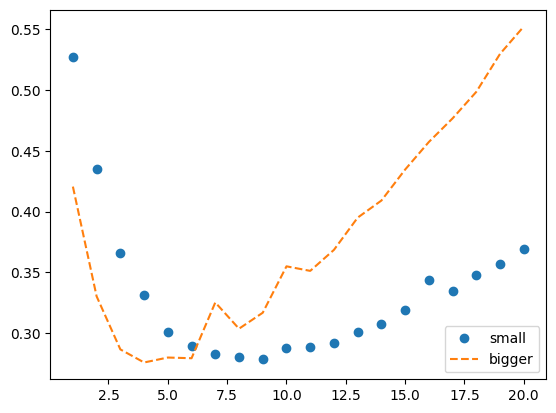

In [63]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
val_loss_values_2=history2.history['val_loss']

epoch=range(1,len(loss_values)+1)
plt.plot(epoch, val_loss_values_2, 'o', label='small')
plt.plot(epoch, val_loss_values, '--', label='bigger')
plt.legend()
plt.show()

REGULARIZACION

In [68]:
from keras import regularizers

model3=models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,), 
                        kernel_regularizer=regularizers.l2(0.001))) #de la libreria de keras utilizamos regularizers 
model3.add(layers.Dense(16, activation='relu',
           kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid')) 
                                           
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy') 

history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5699 - accuracy: 0.7765 - val_loss: 0.4488 - val_accuracy: 0.8625
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3732 - accuracy: 0.8937 - val_loss: 0.3736 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3025 - accuracy: 0.9125 - val_loss: 0.3362 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2600 - accuracy: 0.9292 - val_loss: 0.3431 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2342 - accuracy: 0.9412 - val_loss: 0.3691 - val_accuracy: 0.8710
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2204 - accuracy: 0.9471 - val_loss: 0.3398 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2084 - accuracy: 0.9504 - val_loss: 0.3796 - val_accuracy: 0.8756
Epoch 8/20
30

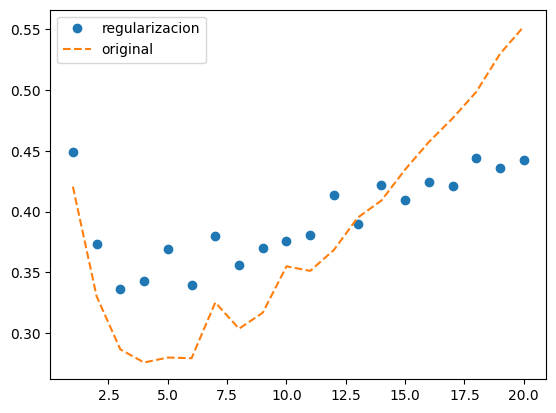

In [70]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
val_loss_values_3=history3.history['val_loss']

epoch=range(1,len(loss_values)+1)
plt.plot(epoch, val_loss_values_3, 'o', label='regularizacion')
plt.plot(epoch, val_loss_values, '--', label='original')
plt.legend()
plt.show()

DROPOUT

In [71]:
#AGREGAMOS UNA CAPA DE DROPOUT CON UNA INACTIVACION DE 50%

model4=models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid')) 
                                           
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy') 

history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 55ms/step - loss: 0.6780 - accuracy: 0.5771 - val_loss: 0.6545 - val_accuracy: 0.7292
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6466 - accuracy: 0.6211 - val_loss: 0.6231 - val_accuracy: 0.8413
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6225 - accuracy: 0.6401 - val_loss: 0.5879 - val_accuracy: 0.8527
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6016 - accuracy: 0.6610 - val_loss: 0.5600 - val_accuracy: 0.8680
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5780 - accuracy: 0.6910 - val_loss: 0.5250 - val_accuracy: 0.8734
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5587 - accuracy: 0.6957 - val_loss: 0.4845 - val_accuracy: 0.8794
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5457 - accuracy: 0.6989 - val_loss: 0.4702 - val_accuracy: 0.8822
Epoch 8/20
30

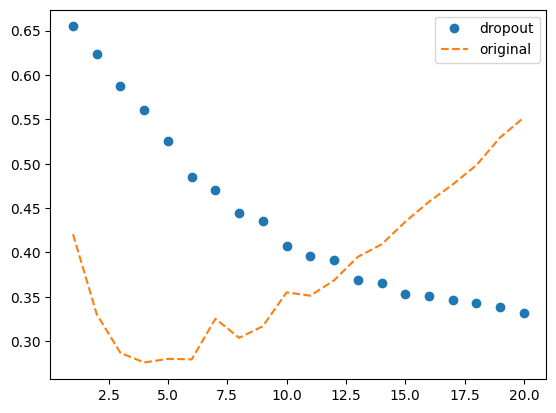

In [72]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
val_loss_values_4=history4.history['val_loss']

epoch=range(1,len(loss_values)+1)
plt.plot(epoch, val_loss_values_4, 'o', label='dropout')
plt.plot(epoch, val_loss_values, '--', label='original')
plt.legend()
plt.show()